# ایمپورت کردن کتابخانه‌ها و آماده‌سازی برای تحلیل داده و آموزش مدل

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier

<font face="B Mitra">
<div dir=rtl>
<font size=5>
<b> بارگذاری مجموعه داده </b>
<br>
</div>
</font>

In [29]:
import pandas as pd
import requests
from io import StringIO

csv_url = "https://drive.google.com/uc?export=download&id=1GfVGnAA0FN6xpRg-clvQavWlh34M-NKH"

response = requests.get(csv_url)

# download data set and load it
if response.status_code == 200:
    if "confirm" in response.url:
        confirm_token = response.cookies["download_warning"]
        new_csv_url = csv_url + "&confirm=" + confirm_token
        response = requests.get(new_csv_url)
        if response.status_code == 200:
            csv_data = response.text
            df = pd.read_csv(StringIO(csv_data))
        else:
            print("Failed to download the CSV file.")
    else:
        csv_data = response.text
        df = pd.read_csv(StringIO(csv_data))
else:
    print("Failed to download the CSV file.")


In [30]:
df_copy= df.copy()
df.describe()

,Unnamed: 0,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Air Velocity,Air Velocity at 9 AM,Air Velocity at 3 PM,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM
count,145460.000000,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,72729.500000,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,41990.829415,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,36364.750000,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,72729.500000,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,109094.250000,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,145459.000000,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [31]:
df = df.drop(columns=[df.columns[0]])

# تبدیل داده های تاریخی


In [32]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].astype(np.int64) // 10**9

# DataFrame

In [33]:
df

,Date,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,Gust Trajectory at 9 AM,...,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Rain that day,Rain the day after
0,1228089600,Station 2,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,1228176000,Station 2,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,1228262400,Station 2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,1228348800,Station 2,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,1228435200,Station 2,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,1498003200,Station 41,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,1498089600,Station 41,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,1498176000,Station 41,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,1498262400,Station 41,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Describe

In [34]:
df.describe()

,Date,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Air Velocity,Air Velocity at 9 AM,Air Velocity at 3 PM,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM
count,1.454600e+05,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,1.365110e+09,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,7.957638e+07,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,1.193875e+09,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,1.294704e+09,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,1.370131e+09,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,1.434240e+09,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,1.498349e+09,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [35]:
df.isnull().sum()

Date                                0
Weather Station                     0
Minimum Temperature              1485
Maximum Temperature              1261
Rainfall                         3261
Evaporation                     62790
Sunshine                        69835
Gust Trajectory                 10326
Air Velocity                    10263
Gust Trajectory at  9 AM        10566
Gust Trajectory at  3 PM         4228
Air Velocity at  9 AM            1767
Air Velocity at  3 PM            3062
Moisture Level at 9 AM           2654
Moisture Level at 3 PM           4507
Atmospheric Pressure at 9 AM    15065
Atmospheric Pressure at 3 PM    15028
Cloudiness at 9 AM              55888
Cloudiness at 3 PM              59358
Recorded Temperature at 9 AM     1767
Recorded Temperature at 3 PM     3609
Rain that day                    3261
Rain the day after               3267
dtype: int64

# مدیریت مقادیر گمشده و حذف ستون‌های غیرضروری

In [36]:
df = df.dropna(subset=['Date','Weather Station','Rain that day','Recorded Temperature at 9 AM','Moisture Level at 9 AM','Rain the day after','Air Velocity at  9 AM'])
df = df.drop(['Recorded Temperature at 3 PM','Recorded Temperature at 9 AM','Gust Trajectory at  9 AM','Gust Trajectory at  3 PM'],axis=1)

In [37]:
df.shape

(138514, 19)

In [38]:
df.isnull().sum()

Date                                0
Weather Station                     0
Minimum Temperature               225
Maximum Temperature               219
Rainfall                            0
Evaporation                     58286
Sunshine                        65040
Gust Trajectory                  8138
Air Velocity                     8124
Air Velocity at  9 AM               0
Air Velocity at  3 PM            1716
Moisture Level at 9 AM              0
Moisture Level at 3 PM           2496
Atmospheric Pressure at 9 AM    12638
Atmospheric Pressure at 3 PM    12710
Cloudiness at 9 AM              50857
Cloudiness at 3 PM              54377
Rain that day                       0
Rain the day after                  0
dtype: int64

# پر کردن مقادیر گمشده برای متغیرهای پیوسته با استفاده از درونیابی
# مدیریت مقادیر گمشده برای متغیرهای دسته‌ای و گسسته

In [39]:
df.loc[:, 'Minimum Temperature'] = df['Minimum Temperature'].interpolate(method='linear')
df.loc[:, 'Maximum Temperature'] = df['Maximum Temperature'].interpolate(method='linear')

df.loc[:, 'Atmospheric Pressure at 9 AM'] = df['Atmospheric Pressure at 9 AM'].interpolate(method='linear')
df.loc[:, 'Atmospheric Pressure at 3 PM'] = df['Atmospheric Pressure at 3 PM'].interpolate(method='linear')


In [40]:
df.loc[:, 'Rainfall'] = df['Rainfall'].fillna(method='ffill')

df.loc[:, 'Sunshine'] = df['Sunshine'].fillna(method='bfill')
df.loc[:, 'Sunshine'] = df['Sunshine'].fillna(method='ffill')

mode_value = df['Gust Trajectory'].mode()[0]
df.loc[:, 'Gust Trajectory'] = df['Gust Trajectory'].fillna(mode_value)

df.loc[:, 'Air Velocity'] = df['Air Velocity'].fillna(method='bfill')
df.loc[:, 'Air Velocity'] = df['Air Velocity'].fillna(method='ffill')

df.loc[:, 'Cloudiness at 9 AM'] = df['Cloudiness at 9 AM'].fillna(method='bfill')
df.loc[:, 'Cloudiness at 9 AM'] = df['Cloudiness at 9 AM'].fillna(method='ffill')

df.loc[:, 'Cloudiness at 3 PM'] = df['Cloudiness at 3 PM'].fillna(method='bfill')
df.loc[:, 'Cloudiness at 3 PM'] = df['Cloudiness at 3 PM'].fillna(method='ffill')


# پر کردن مقادیر گمشده برای 'تبخیر' با استفاده از رگرسیون خطی

In [41]:
direction_mapping = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5, 'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
    'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5, 'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}

yes_no = {
    'Yes':1,
    'No':0
}

In [42]:
df = df.replace({'Gust Trajectory': direction_mapping})
df = df.replace({'Gust Trajectory at  9 AM': direction_mapping})
df = df.replace({'Gust Trajectory at  3 PM': direction_mapping})
df = df.replace({'Rain the day after' : yes_no})
df = df.replace({'Rain that day' : yes_no})
df['Weather Station'] = df['Weather Station'].str.replace(r'Station (\d+)', r'\1', regex=True)

# پر کردن مقادیر گمشده با استفاده از رگرسیون خطی

In [43]:
train_data = df.dropna(subset=['Evaporation'])
predict_data = df[df['Evaporation'].isna()]

X_train = train_data[['Maximum Temperature']]
y_train = train_data['Evaporation']

X_predict = predict_data[['Maximum Temperature']]

model = LinearRegression()
model.fit(X_train, y_train)

# Predict the missing values
predicted_evaporation = model.predict(X_predict)

df.loc[df['Evaporation'].isna(), 'Evaporation'] = predicted_evaporation

In [44]:
train_data = df.dropna(subset=['Air Velocity at  3 PM'])
predict_data = df[df['Air Velocity at  3 PM'].isna()]

X_train = train_data[['Air Velocity']]
y_train = train_data['Air Velocity at  3 PM']

X_predict = predict_data[['Air Velocity']]

model = LinearRegression()
model.fit(X_train, y_train)

# Predict the missing values
predicted_evaporation = model.predict(X_predict)

df.loc[df['Air Velocity at  3 PM'].isna(), 'Air Velocity at  3 PM'] = predicted_evaporation

In [45]:
train_data = df.dropna(subset=['Moisture Level at 3 PM'])
predict_data = df[df['Moisture Level at 3 PM'].isna()]

X_train = train_data[['Moisture Level at 9 AM']]
y_train = train_data['Moisture Level at 3 PM']

X_predict = predict_data[['Moisture Level at 9 AM']]

model = LinearRegression()
model.fit(X_train, y_train)

# Predict the missing values
predicted_evaporation = model.predict(X_predict)

df.loc[df['Moisture Level at 3 PM'].isna(), 'Moisture Level at 3 PM'] = predicted_evaporation

# تمیز کردن داده‌ها با تبدیل به مقادیر عددی و حذف داده‌های پرت

In [46]:
cleaned_df = df.copy()

for feature in df.columns:
    cleaned_df[feature] = pd.to_numeric(cleaned_df[feature], errors='coerce')

    mean = cleaned_df[feature].mean()
    std = cleaned_df[feature].std()

    threshold = mean + 3 * std

    outliers = cleaned_df[cleaned_df[feature] > threshold]

    cleaned_df = cleaned_df.drop(outliers.index)

    df = cleaned_df

# Visualizing Feature Correlations with a Heatmap

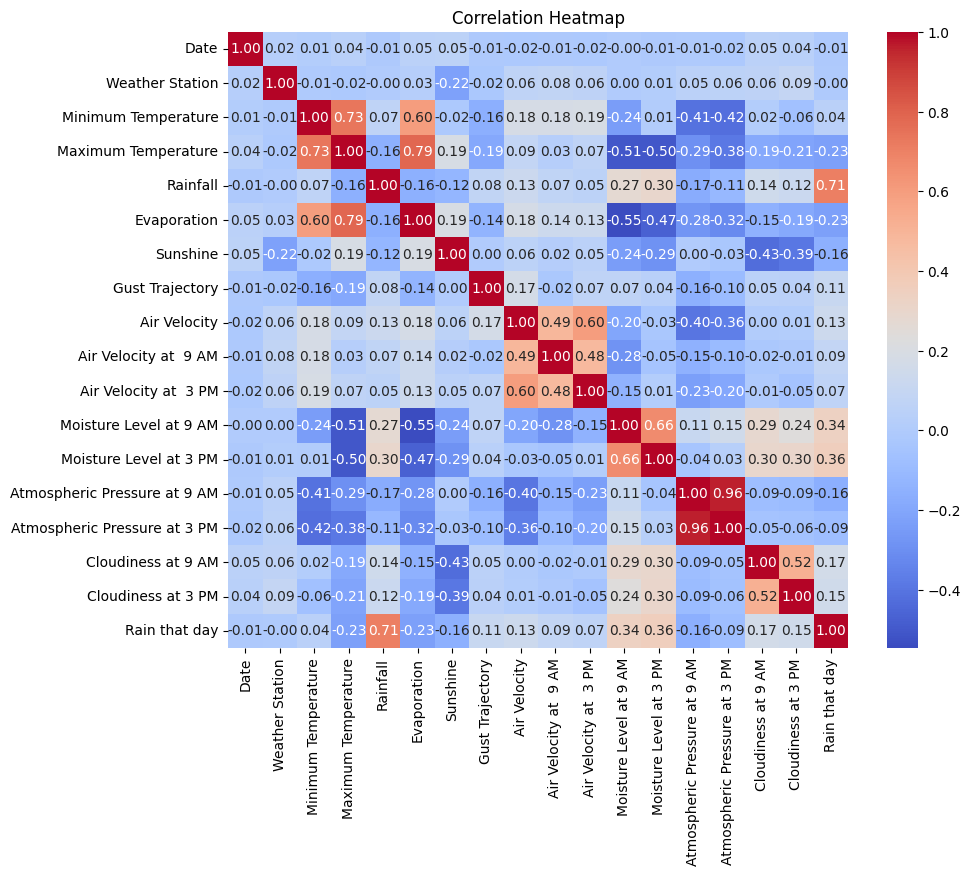

In [47]:
corr_matrix = df.iloc[:, :-1].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# knn داده های نا متعادل و

In [48]:
X,y = df.iloc[:,:-1],df['Rain the day after']

smote = SMOTE(random_state=123)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

In [49]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [50]:
predictions = knn.predict(X_test)

In [51]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

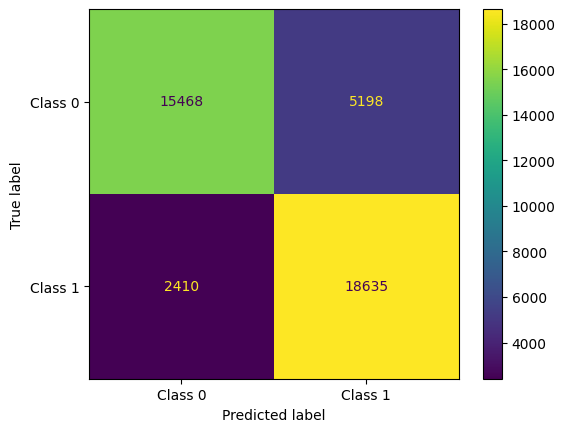

In [52]:
cm = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot()

In [53]:
print(f'Accuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1:{f1:.4f}')

Accuracy: 0.8176
Precision: 0.7819
Recall: 0.8855
F1:0.8305
